<a href="https://colab.research.google.com/github/brunoleme/Custom_Machine_Learning_Framework/blob/main/Examples_Using_Custom_ML_Framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dependencies**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

In [3]:
import sys
sys.path.append('/content/drive/My Drive/Custom_Python_Scripts')

In [4]:
%load '/content/drive/My Drive/Custom_Python_Scripts/bl_ml_toolkit.py'

In [5]:
from bl_ml_toolkit import ImputMissingValues, DummyTransformer, FestureImpoertanceVariableSelection, RegularizationFeatureSelection, VariableClusteringSelection, OptimalNominalBinning, OptimalIntervalBinning

We implement custom classes to automate some tasks like: impute missing values, feature selection, correlation analysis, feature discretization, optimal binning, etc.

Inheriting from TransformerMixin and BaseEstimator base classes from sklearn allow us to use the same logic as sklearn classes, using fit and transform methods.

In [6]:
#from sklearn.base import BaseEstimator, TransformerMixin

#class CustomClass(BaseEstimator, TransformerMixin):

#  def __init__(self, ...):
#    #code...
  
#  def fit(self, x, y=None):
#    #code...

#  def transform(self, x):
#    #code...
#    #return
  
#  def fit_transform(self, x):
#    self.fit(x)
#    return self.transform(x)

# **Impute Missing Values**

This class can be used to fill missing values with some default criterion like mean, median, etc.

In [7]:
sample_data = []
sample_data.append([5, 1, 2, 4, None, 'A'])
sample_data.append([2, 1, 5, None, 4, 'B'])
sample_data.append([None, 7, 5, 3, 1, 'C'])
sample_data.append([6, None, 5, 9, 3, 'B'])
sample_data.append([3, 1, None, 7, 8, None])
df_sample_train_data = pd.DataFrame(sample_data, columns=['col1', 'col2', 'col3', 'col4', 'col5', 'col6'])
df_sample_train_data['col6'] = df_sample_train_data['col6'].astype('category')

sample_data = []
sample_data.append([None, 2, 3, 10, None, None])
sample_data.append([1, None, 6, 1, 0, 'B'])
sample_data.append([7, 9, None, None, 2, 'A'])
sample_data.append([4, 2, 3, 9, 8, 'C'])
df_sample_valid_data = pd.DataFrame(sample_data, columns=['col1', 'col2', 'col3', 'col4', 'col5', 'col6'])
df_sample_valid_data['col6'] = df_sample_valid_data['col6'].astype('category')

In [8]:
df_sample_train_data

,col1,col2,col3,col4,col5,col6
0,5.00,1.00,2.00,4.00,nan,A
1,2.00,1.00,5.00,nan,4.00,B
2,nan,7.00,5.00,3.00,1.00,C
3,6.00,nan,5.00,9.00,3.00,B
4,3.00,1.00,nan,7.00,8.00,NaN


In [9]:
df_sample_valid_data

,col1,col2,col3,col4,col5,col6
0,nan,2.00,3.00,10.00,nan,NaN
1,1.00,nan,6.00,1.00,0.00,B
2,7.00,9.00,nan,nan,2.00,A
3,4.00,2.00,3.00,9.00,8.00,C


In [10]:
from bl_ml_toolkit import ImputMissingValues
imv = ImputMissingValues(missing_threshold=0.5, interval_method='mean', category_method='mode') #implemented interval methods: mean, median, min, max

In [11]:
imv.fit(df_sample_train_data)
df_sample_train_data_2 = imv.transform(df_sample_train_data)
df_sample_train_data_2

,col1,col2,col3,col4,col5,col6
0,5.00,1.00,2.00,4.00,4.00,A
1,2.00,1.00,5.00,5.75,4.00,B
2,4.00,7.00,5.00,3.00,1.00,C
3,6.00,2.50,5.00,9.00,3.00,B
4,3.00,1.00,4.25,7.00,8.00,B


In [12]:
print('interval_method: {}, imput_values: {}'.format(imv.interval_method, imv.interval_imput_dict))
print('nominal_method: {}, imput_values: {}'.format(imv.category_method, imv.category_imput_dict))

interval_method: mean, imput_values: {'col1': 4.0, 'col2': 2.5, 'col3': 4.25, 'col4': 5.75, 'col5': 4.0}
nominal_method: mode, imput_values: {'col6': 'B'}


In [13]:
df_sample_valid_data_2 = imv.transform(df_sample_valid_data)
df_sample_valid_data_2

,col1,col2,col3,col4,col5,col6
0,4.00,2.00,3.00,10.00,4.00,B
1,1.00,2.50,6.00,1.00,0.00,B
2,7.00,9.00,4.25,5.75,2.00,A
3,4.00,2.00,3.00,9.00,8.00,C


The following plot shows us the histogram of features by missing fraction.

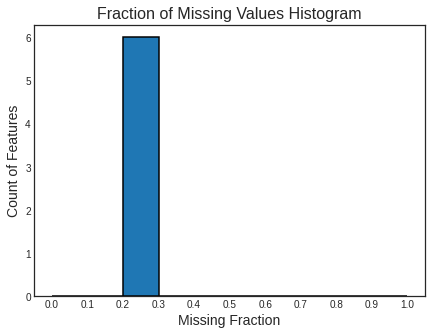

In [14]:
imv.plot_missing()

# **Dummy Variables**

This class build rules to replace categorical features by dummy variables.

In [15]:
df_sample_train_data_2

,col1,col2,col3,col4,col5,col6
0,5.00,1.00,2.00,4.00,4.00,A
1,2.00,1.00,5.00,5.75,4.00,B
2,4.00,7.00,5.00,3.00,1.00,C
3,6.00,2.50,5.00,9.00,3.00,B
4,3.00,1.00,4.25,7.00,8.00,B


In [16]:
df_sample_valid_data_2

,col1,col2,col3,col4,col5,col6
0,4.00,2.00,3.00,10.00,4.00,B
1,1.00,2.50,6.00,1.00,0.00,B
2,7.00,9.00,4.25,5.75,2.00,A
3,4.00,2.00,3.00,9.00,8.00,C


In [17]:
from bl_ml_toolkit import DummyTransformer
#to avoid multicolinearity, we discard the dummy for one of category classes, you can choose a medium, first or last category
dt = DummyTransformer(reference_class_choice = 'medium')

In [18]:
dt.fit(df_sample_train_data_2)
df_sample_train_data_3 = dt.transform(df_sample_train_data_2)
df_sample_train_data_3 #dummy 1 was discarded

,col1,col2,col3,col4,col5,col6_dummy_0,col6_dummy_2
0,5.00,1.00,2.00,4.00,4.00,1.00,0.00
1,2.00,1.00,5.00,5.75,4.00,0.00,0.00
2,4.00,7.00,5.00,3.00,1.00,0.00,1.00
3,6.00,2.50,5.00,9.00,3.00,0.00,0.00
4,3.00,1.00,4.25,7.00,8.00,0.00,0.00


In [19]:
df_sample_valid_data_3 = dt.transform(df_sample_valid_data_2)
df_sample_valid_data_3

,col1,col2,col3,col4,col5,col6_dummy_0,col6_dummy_2
0,4.00,2.00,3.00,10.00,4.00,0.00,0.00
1,1.00,2.50,6.00,1.00,0.00,0.00,0.00
2,7.00,9.00,4.25,5.75,2.00,1.00,0.00
3,4.00,2.00,3.00,9.00,8.00,0.00,1.00


In [20]:
dt.dummy_map

{'col6': {'A': 0, 'B': 1, 'C': 2}}

In [21]:
dt.dummy_inv_map

{'col6': {0: 'A', 1: 'B', 2: 'C'}}

# **Importing Titanic Data, in order to use for Feature Selection, Interval Interactive Binning and Nominal Interactive Binning**

In [22]:
data = pd.read_csv('/content/drive/My Drive/Titanic_Data_Set/Titanic.csv')

In [23]:
data['Family_Name'] = data['Name'].apply(lambda x: str(x).split(',')[0]).astype('category')

In [24]:
data['Pclass'] = data['Pclass'].astype('category')
data['Sex'] = data['Sex'].astype('category')
data['Cabin'] = data['Cabin'].astype('category')
data['Embarked'] = data['Embarked'].astype('category')

In [25]:
data = data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [26]:
data.dtypes

Survived          int64
Pclass         category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Cabin          category
Embarked       category
Family_Name    category
dtype: object

In [27]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_Name
0,0,3,male,22.00,1,0,7.25,NaN,S,Braund
1,1,1,female,38.00,1,0,71.28,C85,C,Cumings
2,1,3,female,26.00,0,0,7.92,NaN,S,Heikkinen
3,1,1,female,35.00,1,0,53.10,C123,S,Futrelle
4,0,3,male,35.00,0,0,8.05,NaN,S,Allen
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.00,NaN,S,Montvila
887,1,1,female,19.00,0,0,30.00,B42,S,Graham
888,0,3,female,nan,1,2,23.45,NaN,S,Johnston
889,1,1,male,26.00,0,0,30.00,C148,C,Behr


In [28]:
X_data = data.drop(['Survived'], axis=1)
Y_data = data[['Survived']]

In [29]:
from sklearn.model_selection import train_test_split
X_data_train, X_data_test, Y_data_train, Y_data_test = train_test_split(X_data, Y_data, test_size=0.33, random_state=54321)

In [30]:
imv = ImputMissingValues(missing_threshold=0.5)

In [31]:
X_data_train_2 = imv.fit_transform(x = X_data_train)

In [32]:
X_data_test_2 = imv.transform(x = X_data_test)

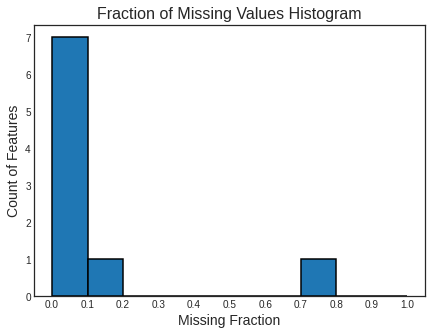

In [33]:
imv.plot_missing()

# **Regularization Feature Selection**

We implement a class to do feature selection, making use of a Lasso Regression, removing features with coef equals to zero.

In [34]:
from bl_ml_toolkit import RegularizationFeatureSelection
rvs = RegularizationFeatureSelection(n_folds=1, RegularizationStrength=0.1)

In [35]:
X_data_train_2

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Name
300,3,female,29.72,0,0,7.75,Q,Kelly
618,2,female,4.00,2,1,39.00,S,Becker
165,3,male,9.00,0,2,20.52,S,Goldsmith
780,3,female,13.00,0,0,7.23,C,Ayoub
664,3,male,20.00,1,0,7.92,S,Lindqvist
...,...,...,...,...,...,...,...,...
150,2,male,51.00,0,0,12.53,S,Bateman
96,1,male,71.00,0,0,34.65,C,Goldschmidt
26,3,male,29.72,0,0,7.22,C,Emir
650,3,male,29.72,0,0,7.90,S,Mitkoff


In [36]:
X_data_train_3 = rvs.fit_transform(X_data_train_2, Y_data_train)

Training Lasso Regression Model



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
X_data_test_3 = rvs.transform(X_data_test_2)

In [38]:
print('before...', X_data_train_2.shape)
print('after...', X_data_train_3.shape)

before... (596, 8)
after... (596, 7)


In [39]:
rvs.drop_list_zero_coeficient

['Parch']

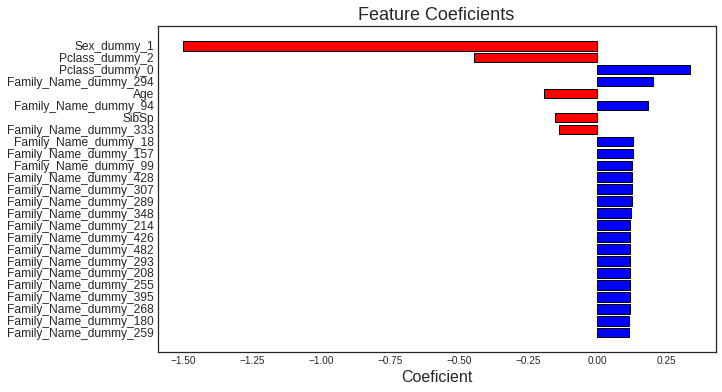

In [40]:
rvs.plot_feature_coefs(plot_n=25)

In [41]:
rvs.dfAbsoluteCoefs

,feature,coef,absolute_coef
5,Sex_dummy_1,-1.50,1.50
4,Pclass_dummy_2,-0.45,0.45
3,Pclass_dummy_0,0.34,0.34
82,Family_Name_dummy_294,0.20,0.20
0,Age,-0.20,0.20
...,...,...,...
53,Family_Name_dummy_174,0.01,0.01
6,Embarked_dummy_0,0.00,0.00
14,Family_Name_dummy_22,0.00,0.00
94,Family_Name_dummy_388,0.00,0.00


In [42]:
X_data_test_3 = rvs.transform(X_data_test_2)

In [43]:
print('before...', X_data_test_2.shape)
print('after...', X_data_test_3.shape)

before... (295, 8)
after... (295, 7)


# **Optimal Interval Binning**

This class can be used to discretizate numerical features, in a optimal way, splitting in several ordinal groups, and making use of statistical hypothesis test for each neighboor groups to hierarquically, to merge groups that are not statistical different.

After finishing the process for all numerical features, we can change the ranges interactvily to improve or simplify de range sets.

In [86]:
oib = OptimalIntervalBinning(sigLevel=0.1, n_rank_groups=10)

In [87]:
oib.fit(X_data_train_3[['Age']], Y_data_train)

Age
    countColumn Survived                                       Age  \
            sum      sum                 mean                 amin   
bin                                                                  
0            30       22                 0.73                 0.42   
1            63       26                 0.41                 7.00   
2            65       16                 0.25                19.00   
3            46       18                 0.39                23.00   
4            58       20                 0.34                26.00   
5           110       30                 0.27                29.72   
6            21        9                 0.43                30.00   
7            54       30                 0.56                30.50   
8            63       25                 0.40                36.00   
9            56       24                 0.43                43.00   
10           30       11                 0.37                55.00   

               

## **Interactive Binning**

In [88]:
[f for f in oib.statistics]

['Age']

Here we can see the range set learned by the fit method.

In [89]:
feature = 'Age'
oib.reset_feature(feature)
oib.original_statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,18.00,75,41,0.55
1,1.00,18.00,29.72,187,61,0.33
2,2.00,29.72,35.00,175,62,0.35
3,3.00,35.00,inf,159,67,0.42


Is it possible to change the ranges, using a splitRange method to split a range with a bondary.

In [90]:
oib.splitRange(feature=feature, split_range=0, split_value=12)
oib.statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,12.00,46,27,0.59
1,1.00,12.00,18.00,29,14,0.48
2,2.00,18.00,29.72,187,61,0.33
3,3.00,29.72,35.00,175,62,0.35
4,4.00,35.00,inf,159,67,0.42


We can also merge 2 or more following ranges, through mergeRange method.

In [91]:
oib.mergeRange(feature=feature, new_start_range=2, new_end_range=3)
oib.statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,12.00,46,27,0.59
1,1.00,12.00,18.00,29,14,0.48
2,2.00,18.00,35.00,362,123,0.34
3,3.00,35.00,inf,159,67,0.42


When we use the transform method, the original feature values will be replaced by the updated ranges.

In [92]:
X_data_train_4a = oib.transform(X_data_train_3)
X_data_test_4a = oib.transform(X_data_test_3)

The transformed feature will receive the prefix 'ibin_'.

In [93]:
np.unique(X_data_train_4a['ibin_Age'].values)

array([0., 1., 2., 3.])

# **Optimal Nominal Binning**

This class can be used to discretizate numerical features, in a optimal way, splitting in several ordinal groups, and making use of statistical hypothesis test for each neighboor groups to hierarquically, to merge groups that are not statistical different.

After finishing the process for all numerical features, we can change the ranges interactvily to improve or simplify de range sets.

In [96]:
onb = OptimalNominalBinning(sigLevel=0.1)

In [97]:
onb.fit(X_data_train_3[['Embarked']], Y_data_train)

Embarked
    countColumn Survived                     
            sum      sum                 mean
bin                                          
0           115       65                 0.57
1           439      152                 0.35
2            42       14                 0.33
current: 1.0 next_bin: 2.0 p_value: 0.8664998725963949 n_current_bin: 439.0 n_next_bin p_current_bin: 0.3462414578587699 p_next_bin: 0.3333333333333333
1.0  now is 2.0
    countColumn Survived                     
            sum      sum                 mean
bin                                          
0           115       65                 0.57
2           481      166                 0.35
Process finished


## **Interactive Binning**

In [98]:
[f for f in onb.statistics]

['Embarked']

Here we can see the classes groups set learned by the fit method.

In [99]:
feature = 'Embarked'
onb.reset_feature(feature)
onb.original_statistics[feature]

,bin,n_obs,n_events,event_rate,class_list
0,0,115,65,0.57,['C']
1,2,481,166,0.35,"['Q', 'S']"


It is possible to assign a class to a new or an existent bin.

In [102]:
onb.changeFeatureBin(feature, 'Q', 1)
onb.statistics[feature]

,bin,n_obs,n_events,event_rate,class_list
0,0,115,65,0.57,['C']
1,1,42,14,0.33,['Q']
2,2,439,152,0.35,['S']


When we use the transform method, the original feature values will be replaced by the updated ranges.

In [103]:
X_data_train_4b = onb.transform(X_data_train_3)
X_data_test_4b = onb.transform(X_data_test_3)

The transformed feature will receive the prefix 'cbin_'.

In [104]:
np.unique(X_data_train_4b['cbin_Embarked'].values)

array([0, 1, 2])

# **Variable Clustering (Correlation Feature Selection)**

Class to perform variable selection based on correlation analysis. The process works in 2 steps:

1.   Clustering of veriables with R2 as distance measure
2.   Selecting inside each cluster, the variable with lower 1-Rˆ2 Ratio

In [81]:
X_data_train = pd.read_csv('/content/drive/My Drive/Arrhythmia/arrhythmia_train_treated.data')
X_data_test = pd.read_csv('/content/drive/My Drive/Arrhythmia/arrhythmia_test_treated.data')

In [77]:
vcs = VariableClusteringSelection(dissimilarity_threshold=0.9) #correlation threshold >= 0.1 (1 - 0.9)

In [78]:
X_data_train_2 = vcs.fit_transform(X_data_train)

Fitting Agglomerative Clustering



/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


In [79]:
print('before...', X_data_train.shape)
print('after...', X_data_train_2.shape)

before... (302, 34)
after... (302, 25)


In [82]:
X_data_test_2 = vcs.transform(X_data_test)

In [83]:
print('before...', X_data_test.shape)
print('after...', X_data_test_2.shape)

before... (150, 34)
after... (150, 25)


Clusters of variables, using abolute of R2 as distance measure.

In [87]:
vcs.df_variable_scores

,cluster,variable,own_cluster_Rˆ2,neighbor_cluster_Rˆ2,1-Rˆ2 Ratio
0,14.00,channel AVL - avg width of - R',1.00,0.02,0.00
1,6.00,channel DI - amplitude of - T wave,0.75,0.00,0.25
2,6.00,channel AVR - amplitude of - T wave,0.86,0.01,0.14
3,6.00,channel V6 - amplitude of - T wave,0.78,0.02,0.23
4,15.00,channel V2 - avg width of - R',0.91,0.02,0.09
5,15.00,channel V2 - amplitude of - R',0.91,0.03,0.09
6,16.00,channel V1 - avg width of - S wave,1.00,0.01,0.00
7,17.00,Unnamed: 0,1.00,0.01,0.00
8,18.00,Sex,1.00,0.04,0.00
9,19.00,channel V3 - amplitude of - QRSTA,1.00,0.16,0.00


Selection the best variables considering the lower 1-Rˆ2 Ratio. To calculate this, we calculate the R2 of each variables with all other variables of the own cluster (using a Linear Regression), then we calculate the R2 of each variable of the cluster again, but with all variables from the nearest cluster of the own cluster.

As a result, we calculate 1-Rˆ2 Ratio = (1 - R2 own cluster)/(1 - R2 nearest cluster).

The intuition of this measure is to select the variable that will keep the maximum of new information, retaining the maximum of the information of its cluster, but avoiding to repeat information present in the nearest cluster.

In [86]:
vcs.df_best_variables

,cluster,variable,own_cluster_Rˆ2,neighbor_cluster_Rˆ2,1-Rˆ2 Ratio
0,14.00,channel AVL - avg width of - R',1.00,0.02,0.00
25,5.00,channel V3 - amplitude of - T wave,1.00,0.09,0.00
22,9.00,channel V4 - amplitude of - R wave,1.00,0.04,0.00
21,8.00,channel AVR - avg width of - Existence of diph...,1.00,0.04,0.00
20,11.00,channel V3 - amplitude of - P wave,1.00,0.01,0.00
19,12.00,channel V1 - amplitude of - R wave,1.00,0.04,0.00
18,13.00,channel AVL - avg width of - Number of intrins...,1.00,0.05,0.00
17,10.00,channel V5 - avg width of - Q wave,1.00,0.04,0.00
13,23.00,channel DI - avg width of - R',1.00,0.02,0.00
12,22.00,QRS duration,1.00,0.12,0.00


In following, we can inspect the reduced correlation graph between features.

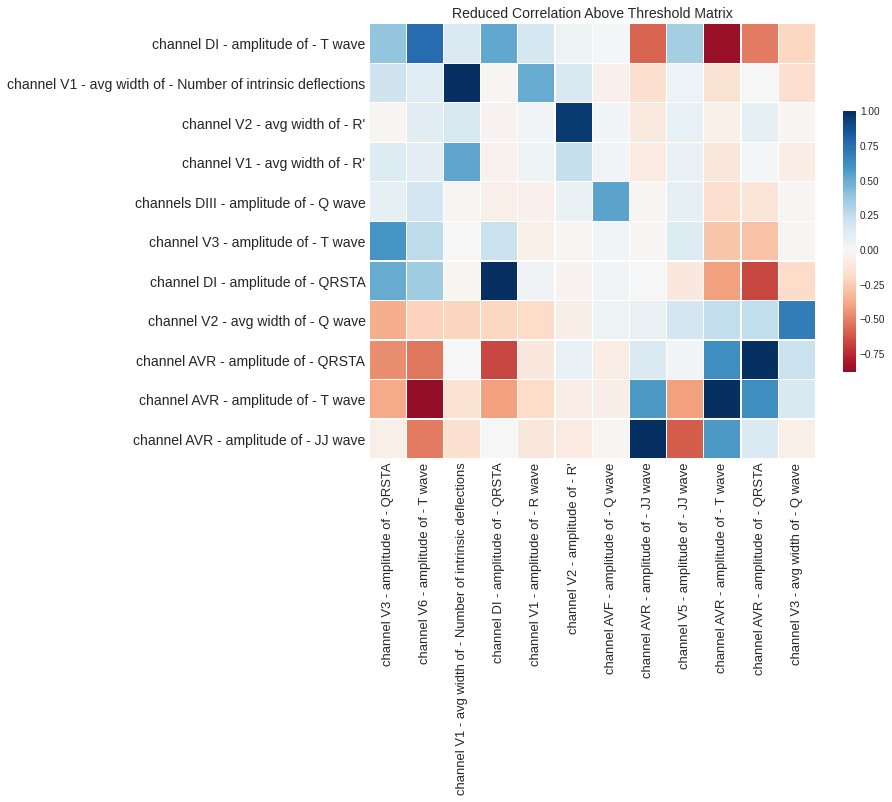

In [85]:
vcs.plot_collinear(correlation_threshold=0.5, cmap='RdBu')